<a href="https://colab.research.google.com/github/BasitHussain5/Bangala-Text-NLP-Project/blob/main/Copy_of_EDA%2CPreprocessing_On_Bangla_Text_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil



# **Updating/Installing Libraries**

In [ ]:
#!pip install keras
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-gpu
!pip install xlrd==1.2.0
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


# **Importing Libraries**

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time
from collections import Counter

from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.python.keras.models import Sequential

from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

ModuleNotFoundError: No module named 'unidecode'

# **Loading Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bangla NLP Project/Dataset/Bengali_Banglish_80K_Dataset.csv")


In [ ]:
display(df)

,Bengali,Label,Banglish
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,ekhane kaoke kobor diyo na tahole tomader pori...
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,kinto voy kiser theke ami jantamna kinto amar ...
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear,kronavairas theke srishto rog covid 19 bishbob...
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear,citao tar dike egote sahosh pacche na dudiner ...
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear,rani meri tiudrer pretatma etaaj ceshta korlam...
...,...,...,...
80093,কী ম্যাচিউর একটা কাজ! আশফাক নিপুনরা আছে বলেই এ...,disgust,ki mjaciur ekta kaj! ashfak nipunra ache bolei...
80094,সত্যটা কি সেটা আসলে জান্তে পারলাম না । আর পুরা...,surprise,sotjta ki sheta asle jante parlam na . ar pura...
80095,এভাবেই পুরুষেরা পার পেয়ে যায়।কিন্তু তাদের চোখে...,surprise,evabei purushera paro peye jay.kintu tader cok...
80096,যদিও আফরান নিশু বস আছে বসের নাটক বাদ দেয় না তা...,disgust,jdio afran nishu bos ache boser natok bad dey ...


In [ ]:
df = df.drop('Banglish', axis=1)

In [ ]:
df

,Bengali,Label
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear
...,...,...
80093,কী ম্যাচিউর একটা কাজ! আশফাক নিপুনরা আছে বলেই এ...,disgust
80094,সত্যটা কি সেটা আসলে জান্তে পারলাম না । আর পুরা...,surprise
80095,এভাবেই পুরুষেরা পার পেয়ে যায়।কিন্তু তাদের চোখে...,surprise
80096,যদিও আফরান নিশু বস আছে বসের নাটক বাদ দেয় না তা...,disgust


# **DataSet Description**

In [ ]:
print("First rows of TrainSet....")
df.head()

First rows of TrainSet....


,Bengali,Label
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear


In [ ]:
print("Description of TrainSet...")
df.describe()

Description of TrainSet...


,Bengali,Label
count,80098,80098
unique,80098,6
top,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,joy
freq,1,17837


In [ ]:
print("Dataframe Information on DataSet...")
df.info()

Dataframe Information on DataSet...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80098 entries, 0 to 80097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Bengali  80098 non-null  object
 1   Label    80098 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
print("Categories of dataset:")
print(df.Label.unique())
category_list=df.Label.unique()

Categories of dataset:
['fear' 'anger' 'sadness' 'disgust' 'joy' 'surprise']


# **Removing Null Values**

In [ ]:
df.dropna(inplace=True)

# **Removing Low Length Data**

In [ ]:
#counting text length
df['count'] = df['Bengali'].str.split().str.len()
# Remove the text with words less than 5
df= df.loc[df['count']>5]


# **Preprocessing/Cleaning**
Though the dataset is said to have been cleaned,but i have applied it anyway to remove Unecessary charachters,Emojis,Punctuations with the help of Regex.

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
df['Bengali'] = df.Bengali.apply(lambda x: preprocessing(str(x)))

<ipython-input-81-8c27d75f9e4a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **Stopwords Removal**

This is a stopwords list containing about 700+ bangla stopwords. I have collected from kaggale this stopwords.

In [ ]:
data1 =pd.read_excel('/content/drive/MyDrive/Bangla NLP Project/Dataset/bangla_stopwords.xlsx')
stop = data1['word_list'].tolist()

In [ ]:
display(data1)

,Unnamed: 0,word_list
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [ ]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)

In [ ]:
df['Bengali'] = df.Bengali.apply(lambda x: stopwordRemoval(str(x)))

<ipython-input-85-c6ddb9815125>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **Stemming**

In [ ]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [ ]:
df['Bengali']=df['Bengali'].apply(stem_text)

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first ru

<ipython-input-87-c19667721253>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.to_csv('CleanedDataset.csv', index=False)

# **Category Wise Data Distribution**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

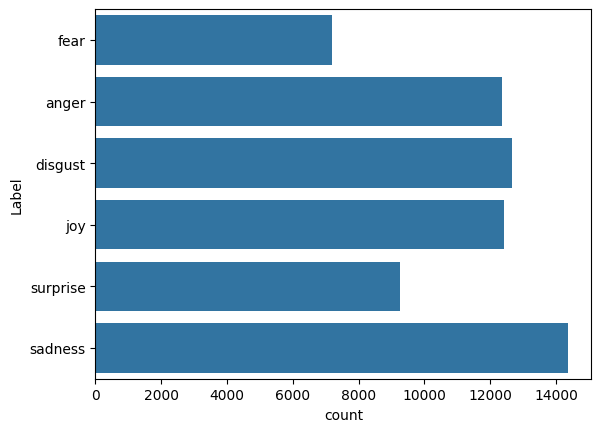

In [ ]:
sns.countplot(df['Label']);

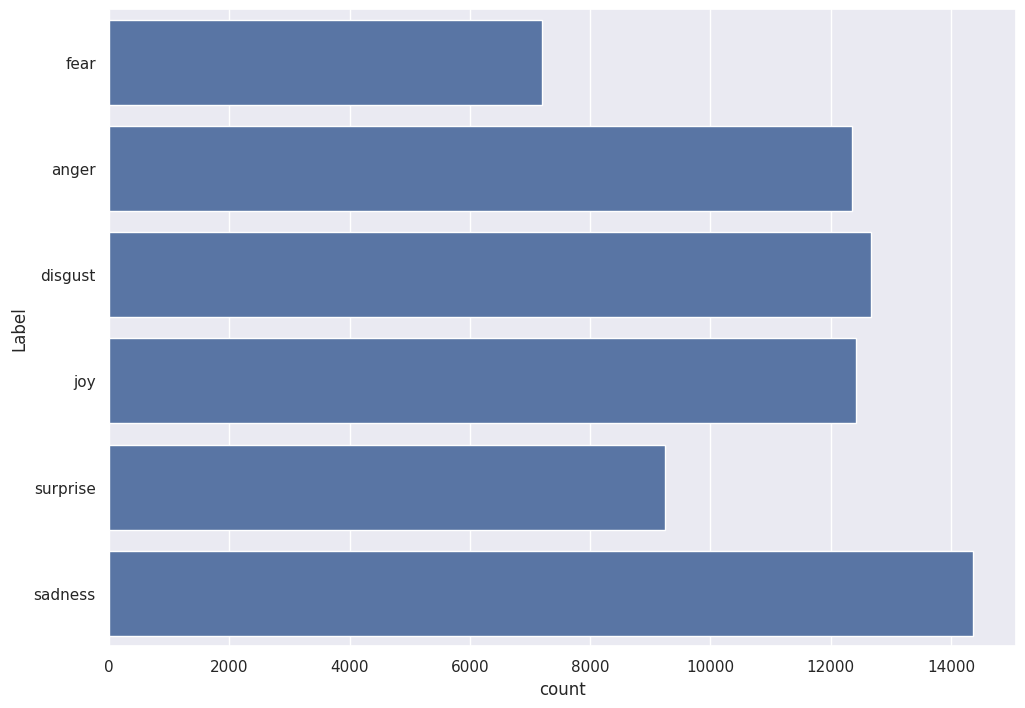

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df['Label']);

In both dataset,the data have no imbalance problem. We can see that every class have sufficient amount of data.

# **Count of Texts in Each Category**

In [ ]:
print("IN data SET...")
temp1 = df.groupby('Label').count()['Bengali'].reset_index().sort_values(by='Bengali',ascending=False)
temp1.style.background_gradient(cmap='Purples')

IN data SET...


,Label,Bengali
4,sadness,14358
1,disgust,12663
3,joy,12422
0,anger,12356
5,surprise,9248
2,fear,7200


# **Funnel Chart of Data Distribution**

In [ ]:
from plotly import graph_objs as go
print("On Data Set....")
fig = go.Figure(go.Funnelarea(
    text =temp1.Label,
    values = temp1.Bengali,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution on Train Set"}
    ))
fig.show()

On Data Set....


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Count Based Top Words in Each Category on Data Set**

In [ ]:
import pandas as pd
from collections import Counter
for i in category_list:
    temp = df.loc[df['Label'] == str(i)]
    temp['temp_list'] = temp['Bengali'].fillna('').apply(lambda x: str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp_df = pd.DataFrame(top.most_common(20))
    styled_temp = temp_df.style.background_gradient(cmap='Blues').set_caption('Top 20 Words In ' + str(i) + " Category")
    display(styled_temp)

<ipython-input-53-f90a3101e367>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Common_words,count
0,না,2187
1,ভয়,1288
2,বোধ,1214
3,কর,867
4,এক,602
5,সাথে,583
6,কথা,511
7,অনুভব,467
8,ভয়,405
9,আল্লাহ,397


<ipython-input-53-f90a3101e367>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Common_words,count
0,না,4581
1,কথা,1160
2,পুলিশ,1044
3,দেশ,997
4,এক,878
5,টাকা,800
6,ভাই,724
7,বিচ,704
8,দেশের,675
9,সাথে,656


<ipython-input-53-f90a3101e367>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Common_words,count
0,না,7029
1,গান,2815
2,কথা,2023
3,ভালো,1796
4,এক,1509
5,সাথে,1404
6,কষ্ট,1326
7,মানুষ,1181
8,জীবন,1083
9,যায়,936


<ipython-input-53-f90a3101e367>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Common_words,count
0,না,6166
1,কথা,1611
2,এক,1316
3,পুলিশ,1309
4,ভালো,1262
5,মায়,1226
6,দেশ,1154
7,সাথে,1092
8,মানুষ,951
9,টাকা,913


<ipython-input-53-f90a3101e367>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Common_words,count
0,ভাই,2364
1,ভালো,2297
2,গান,1852
3,না,1784
4,ধন্যবাদ,1348
5,আপনা,1192
6,এক,1189
7,আল্লাহ,994
8,সুন্দর,986
9,সাথে,860


<ipython-input-53-f90a3101e367>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Common_words,count
0,না,2368
1,সাথে,725
2,গান,690
3,কথা,653
4,অবাক,639
5,এক,573
6,কর,480
7,ভাই,352
8,যায়,328
9,বোধ,328


# **Top 20 Words in DataSet Based on Count**

In [ ]:

df['temp_list'] = df['Bengali'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

<ipython-input-54-61fb6f78bda2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Common_words,count
0,না,24115
1,কথা,6769
2,ভালো,6406
3,এক,6067
4,গান,5934
5,সাথে,5320
6,ভাই,5292
7,মানুষ,3700
8,দেশ,3557
9,আপনা,3302


# **Histogram Analysis Based on Text Length**

In [ ]:
fig = go.Figure(layout=dict(title=dict(text="Text Length Histogram of Trainset")))
fig.add_trace(go.Histogram(x=df['count']))
fig.show()

From the histogram,we can say that abobut 97% of the text lenght are between 1-100. This information is valuable for model creation and text lenght selection.

# **N gram Analysis**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bangla NLP Project/Dataset/Bengali_Banglish_80K_Dataset.csv")


In [ ]:
# function to create top 20 n-grams
def get_ngrams(data,n):
    all_words = []
    for i in range(len(data)):
        temp = data["Bengali"][i].split()
        for word in temp:
            all_words.append(word)

    tokenized = all_words
    esBigrams = ngrams(tokenized, n)

    esBigram_wordlist = nltk.FreqDist(esBigrams)
    top20 = esBigram_wordlist.most_common(20)
    top20 = dict(top20)
    df_ngrams = pd.DataFrame(sorted(top20.items(), key=lambda x: x[1])[::-1])
    df_ngrams.columns = ['Ngram','count']
    return df_ngrams


# function to visualize the top 20 n-grams
def show(train):
    display(train.head(20))

# **Top 20 Unigram Count Based On Category**

In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk import ngrams
from nltk.probability import FreqDist

In [ ]:


for i in category_list:
    temp=df.loc[df['Label'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Bengali'].apply(lambda x:str(x).split())
    temp.reset_index(drop=True, inplace=True)
    train_unigrams = get_ngrams(temp,1)
    print("\t\t\t====== Unigrams of "+str(i)+"======")
    show(train_unigrams)

<ipython-input-65-271386fd0f45>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Unigrams of fear======


,Ngram,count
0,"(আমি,)",4017
1,"(আমার,)",1890
2,"(না,)",1785
3,"(করে,)",1503
4,"(এবং,)",1466
5,"(এই,)",1335
6,"(বোধ,)",1266
7,"(যে,)",1101
8,"(করি,)",1085
9,"(থেকে,)",906


<ipython-input-65-271386fd0f45>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Unigrams of anger======


,Ngram,count
0,"(না,)",3368
1,"(এই,)",2534
2,"(করে,)",2436
3,"(আর,)",2018
4,"(কি,)",1874
5,"(করা,)",1262
6,"(জন্য,)",1106
7,"(যে,)",1065
8,"(হবে,)",1045
9,"(ও,)",1044


<ipython-input-65-271386fd0f45>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Unigrams of sadness======


,Ngram,count
0,"(না,)",5155
1,"(আমার,)",3751
2,"(এই,)",3575
3,"(আর,)",3434
4,"(করে,)",3160
5,"(আমি,)",3158
6,"(অনেক,)",2269
7,"(তার,)",2198
8,"(কি,)",1974
9,"(কথা,)",1801


<ipython-input-65-271386fd0f45>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Unigrams of disgust======


,Ngram,count
0,"(না,)",4590
1,"(এই,)",3716
2,"(করে,)",3530
3,"(আর,)",2885
4,"(কি,)",2457
5,"(তার,)",1865
6,"(যে,)",1722
7,"(কে,)",1577
8,"(তো,)",1507
9,"(ও,)",1488


<ipython-input-65-271386fd0f45>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Unigrams of joy======


,Ngram,count
0,"(অনেক,)",3304
1,"(ভাই,)",2659
2,"(ভালো,)",2648
3,"(এই,)",2317
4,"(আমার,)",2257
5,"(আমি,)",2116
6,"(জন্য,)",1729
7,"(আপনার,)",1527
8,"(করে,)",1479
9,"(ধন্যবাদ,)",1412


<ipython-input-65-271386fd0f45>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Unigrams of surprise======


,Ngram,count
0,"(আমি,)",3460
1,"(আমার,)",2386
2,"(না,)",1814
3,"(এবং,)",1598
4,"(এই,)",1434
5,"(করে,)",1376
6,"(কি,)",1334
7,"(যে,)",1168
8,"(জন্য,)",1121
9,"(একটি,)",1077


# **Top 20 Bigram Count Based On Category**

In [ ]:
for i in category_list:
    temp=df_train.loc[df_train['category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['cleanText'].apply(lambda x:str(x).split())
    temp.reset_index(drop=True, inplace=True)
    train_bigrams = get_ngrams(temp,2)
    print("\t\t\t====== Bigrams of "+str(i)+" ======")
    show(train_bigrams)

# **Top 20 Trigram Count Based On Category**

In [ ]:
for i in category_list:
    temp=df.loc[df['Label'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Bengali'].apply(lambda x:str(x).split())
    temp.reset_index(drop=True, inplace=True)
    train_trigrams = get_ngrams(temp,3)
    print("\t\t\t====== Trigrams of "+str(i)+" ======")
    show(train_trigrams)

<ipython-input-66-aefb270c1d1a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Trigrams of fear ======


,Ngram,count
0,"(বোধ, করছি, আমি)",175
1,"(বোধ, করি, আমি)",136
2,"(আমি, মনে, করি)",82
3,"(আমার, মনে, হয়)",60
4,"(বোধ, করছি, এবং)",46
5,"(ছি, ছি, ছি)",38
6,"(করতে, পারি, না)",38
7,"(আমার, মনে, হচ্ছে)",37
8,"(অনুভব, করি, আমি)",37
9,"(না, না, না)",35


<ipython-input-66-aefb270c1d1a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Trigrams of anger ======


,Ngram,count
0,"(তা, না, হলে)",33
1,"(আইনের, আওতায়, আনা)",30
2,"(ছি, ছি, ছি)",28
3,"(আমার, মনে, হয়)",27
4,"(বাতিল, করা, হোক)",21
5,"(বন্ধ, করে, দেওয়া)",21
6,"(আইন, সবার, জন্য)",19
7,"(আইনের, আওতায়, এনে)",19
8,"(অবশ্যই, বাতিল, করা)",18
9,"(কোটা, ব্যবস্থা, বাতিল)",18


<ipython-input-66-aefb270c1d1a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Trigrams of sadness ======


,Ngram,count
0,"(এই, গান, টা)",132
1,"(তার, কথা, মনে)",63
2,"(চোখে, পানি, চলে)",62
3,"(পানি, ধরে, রাখতে)",58
4,"(এই, গান, গুলো)",54
5,"(চোখের, পানি, ধরে)",54
6,"(কথা, মনে, পরে)",53
7,"(কথা, মনে, পড়ে)",48
8,"(খুব, মিস, করি)",47
9,"(ধরে, রাখতে, পারলাম)",45


<ipython-input-66-aefb270c1d1a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Trigrams of disgust ======


,Ngram,count
0,"(ঈগল, ঈগল, ঈগল)",338
1,"(আমার, মনে, হয়)",56
2,"(ছি, ছি, ছি)",48
3,"(আমি, মনে, করি)",45
4,"(চোর, চোর, চোর)",41
5,"(হতে, পারে, না)",40
6,"(করতে, পারে, না)",40
7,"(তা, না, হলে)",33
8,"(থু, থু, থু)",32
9,"(আমার, মনে, হয়)",30


<ipython-input-66-aefb270c1d1a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Trigrams of joy ======


,Ngram,count
0,"(খুব, ভালো, লাগলো)",112
1,"(অনেক, অনেক, ধন্যবাদ)",106
2,"(অনেক, ভালো, লাগলো)",93
3,"(যুগ, যুগ, ধরে)",84
4,"(হা, হা, হা)",83
5,"(এই, গান, টা)",70
6,"(যুগ, ধরে, মানুষ)",68
7,"(লাইক, দিলে, নোটিফিকেশন)",63
8,"(ধরে, মানুষ, যখন)",61
9,"(কেউ, লাইক, দিলে)",59


<ipython-input-66-aefb270c1d1a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



			====== Trigrams of surprise ======


,Ngram,count
0,"(হা, হা, হা)",120
1,"(আমি, মনে, করি)",89
2,"(আমার, মনে, হয়)",47
3,"(করতে, পারি, না)",43
4,"(কথায়, কথায়, কথায়)",36
5,"(করতে, পারে, না)",32
6,"(জন্য, অপেক্ষা, করতে)",30
7,"(আমার, মনে, হয়)",30
8,"(আমি, আশা, করি)",29
9,"(অভিভূত, বোধ, করছি)",26


# **Word Cloud Based On Category**

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Function for generating word clouds
def generate_wordcloud(data,title):
  data = [tuple(x) for x in data.values]
  wc = WordCloud(font_path="/content/drive/MyDrive/Bangla NLP Project/Dataset/Siyam Rupali Regular.ttf",width=1080, height=720, max_words=150,colormap="Dark2").generate_from_frequencies(dict(data))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap("Word Cloud of "+title,60)),fontsize=13)
  plt.show()

<ipython-input-69-c1847924a29c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



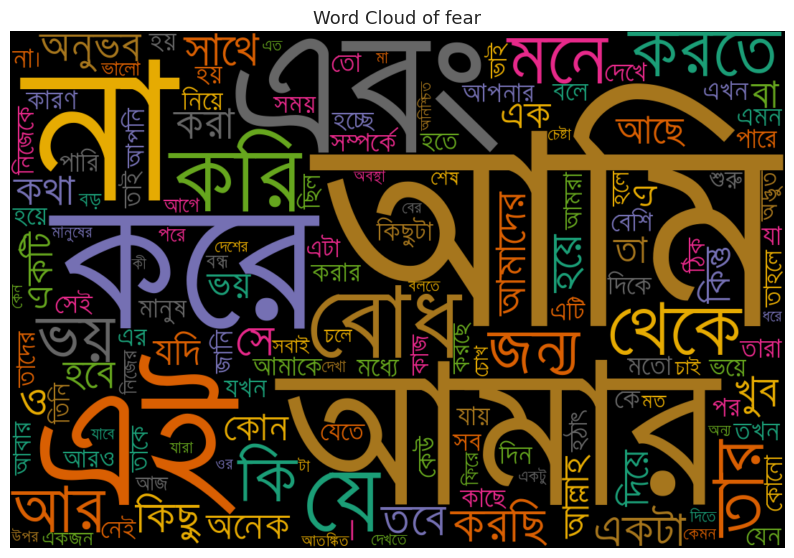

<ipython-input-69-c1847924a29c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



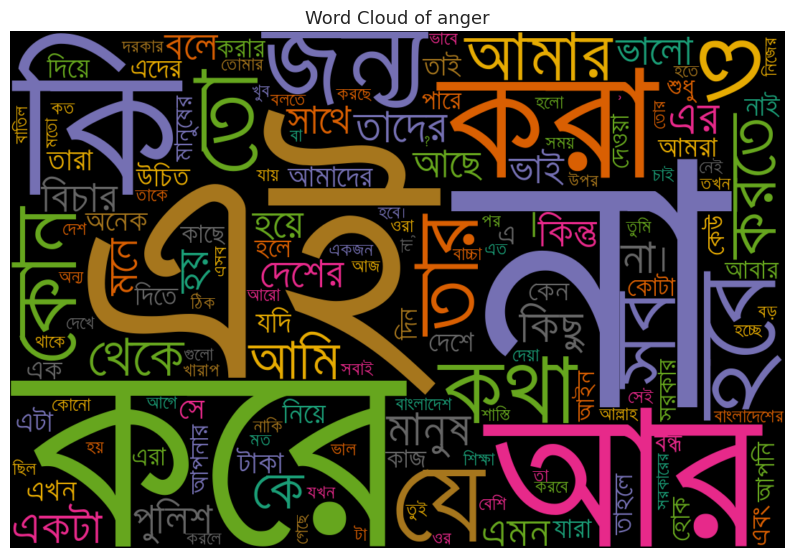

<ipython-input-69-c1847924a29c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



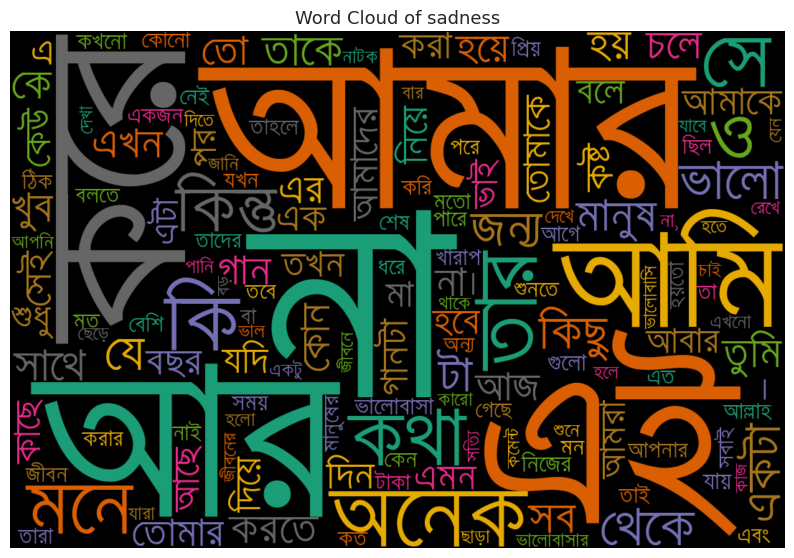

<ipython-input-69-c1847924a29c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



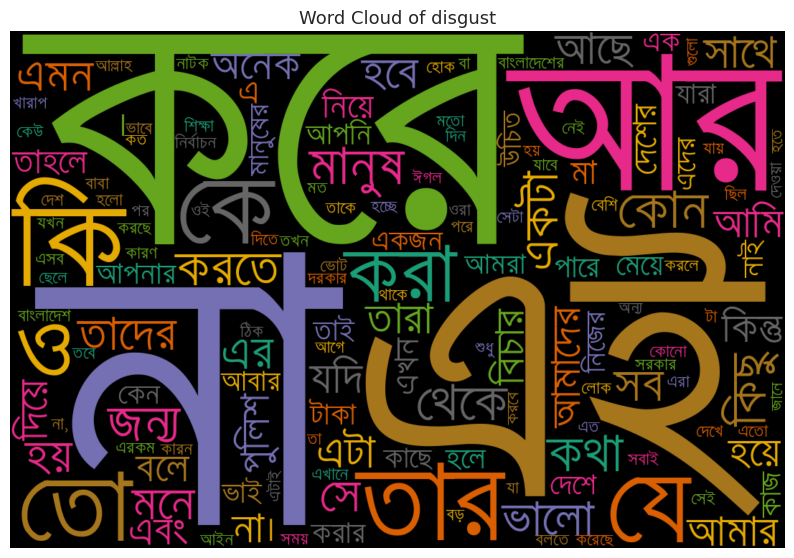

<ipython-input-69-c1847924a29c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



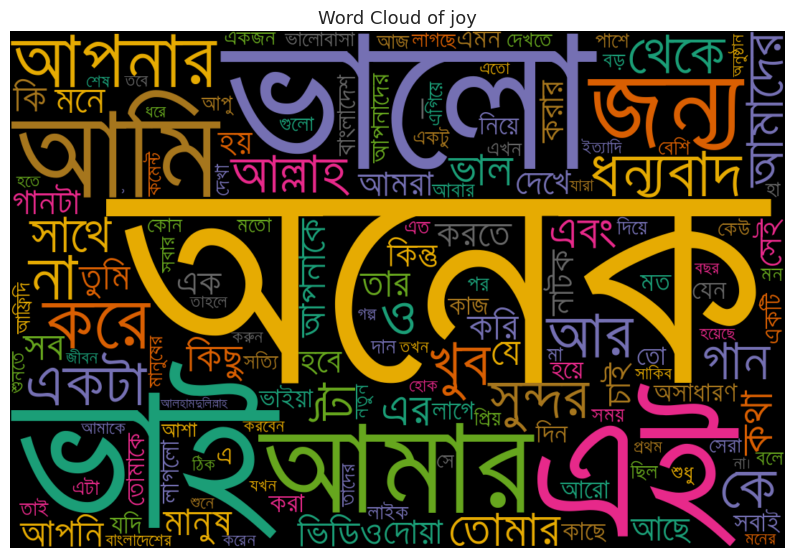

<ipython-input-69-c1847924a29c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



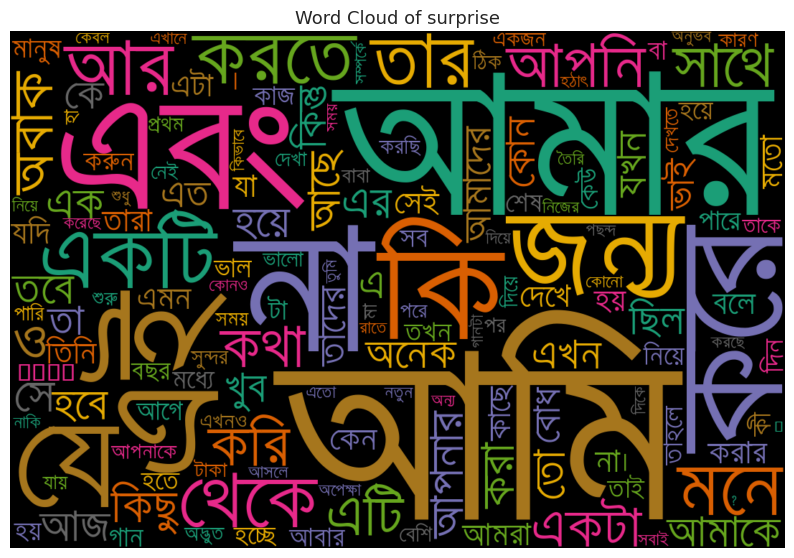

In [ ]:
for i in category_list:
    temp=df.loc[df['Label'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Bengali'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(500000))
    temp.columns = ['Common_words','count']
    generate_wordcloud(temp,str(i))
